## Use the *Machine Learning Workflow* to process & transform Pima Indian data to create a prediction model.
### This model must predict which people are likely to develop diabetes with 70% accuracy! 

##Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#plot inline instead of seperate windows
%matplotlib inline

## Load and review data


In [100]:
df = pd.read_csv('./data/pima-data.csv')


In [101]:
df.shape


(768, 10)

In [102]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [14]:
df.isnull().values.any()

False

In [18]:
def plot_correlatedValues(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

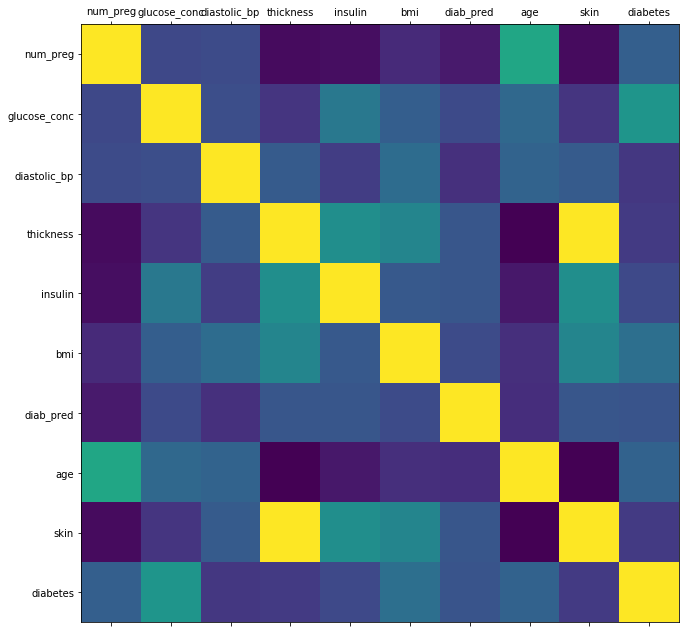

In [19]:
plot_correlatedValues(df)

In [20]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [21]:
del df['skin']


In [22]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


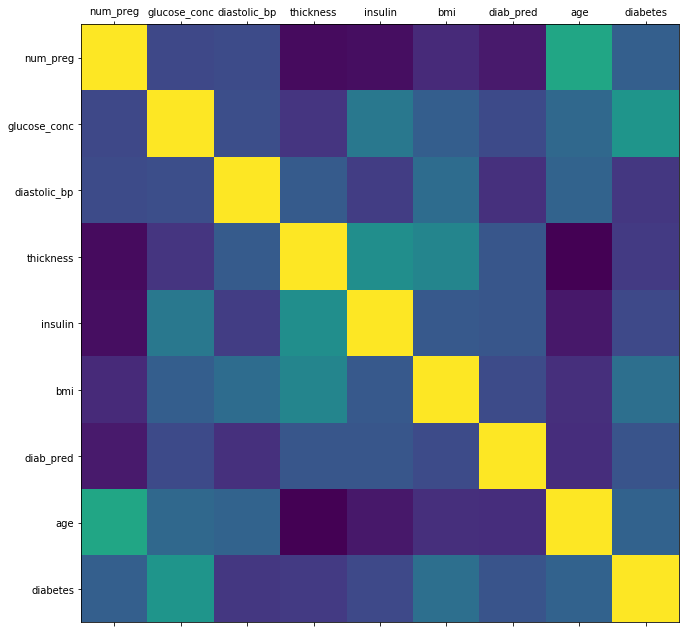

In [23]:
plot_correlatedValues(df)


change diabetes column values from True/False to 1/0


In [26]:
diabetes_map = {True:1, False:0}

In [27]:
diabetes_map

{False: 0, True: 1}

In [28]:
df['diabetes'] = df['diabetes'].map(diabetes_map)


In [29]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# check true/false ratio

In [31]:
num_true = len(df.loc[df['diabetes']==True])
               
num_false = len(df.loc[df['diabetes']==False]  )
                

print("# of cases  the diabetes is True:- {0}({1:2.2f}%)".format(num_true, (num_true /(num_true+num_false))*100 ))

print("# of cases  the diabetes is False:- {0}({1:2.2f}%)".format(num_false, (num_false /(num_true+num_false))*100 ))

# Splitting the data

70% training : 30% testing

In [42]:
from sklearn.cross_validation import train_test_split


In [43]:
feature_col_names = ['num_preg','glucose_conc',	'diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_name = ['diabetes']

In [47]:
X = df[feature_col_names].values
y = df[predicted_class_name].values
split_test_size = 0.30

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size= split_test_size, random_state=42)


In [49]:
print(' {0}({0:2.2f}%) in training set '.format((len(X_train)/len(df.index))*100))
print(' {0}({0:2.2f}%) in test set '.format((len(X_test)/len(df.index))*100))

 69.921875(69.92%) in training set 
 30.078125(30.08%) in test set 


Confirm the split of predict values was correctly done

In [50]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


rows have have unexpected 0 values?

In [51]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


Impute missing values

In [53]:
from sklearn.preprocessing import Imputer

In [54]:
fill_0 = Imputer(missing_values=0, strategy='mean', axis=0)

In [55]:
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

 Use Naive Bayes algorithm to train models

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
nb_model = GaussianNB()

In [61]:
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [62]:
nb_predict_train = nb_model.predict(X_train)


In [63]:
from sklearn import metrics

In [64]:
print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy : 0.7542



### Performance on Testing Data

In [65]:
nb_predict_test = nb_model.predict(X_test)

In [66]:
print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy : 0.7359



#### Naive Bayes Metrics

In [67]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



#### Random Forest


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf_model = RandomForestClassifier(random_state=42)

In [73]:
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

##### Prediction on Training Data

In [75]:
rf_predict_train = rf_model.predict(X_train)

In [76]:
print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_train, rf_predict_train)))
print()

Accuracy : 0.9870



##### Prediction on Test Data

In [77]:
rf_predict_test = rf_model.predict(X_test)
print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

Accuracy : 0.7100



#### Random Forest Metrics

In [78]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



#### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr_model = LogisticRegression(C=0.7, random_state=42)

In [83]:
lr_model = lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

Accuracy : 0.7446



##### Logistic Regression Metrics

In [84]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[128  23]
 [ 36  44]]

Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



###### Regularize

1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

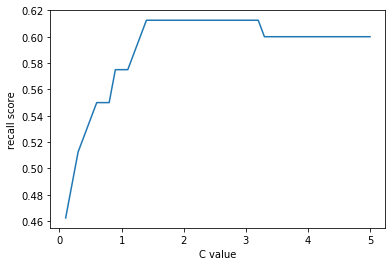

In [85]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

#### Logistic Regression with balanced weight class


1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

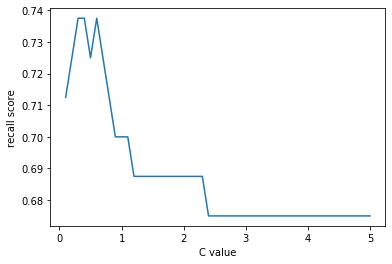

In [86]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [87]:
lr_model = LogisticRegression(class_weight='balanced',C=best_score_C_val, random_state=42)

In [88]:
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

Accuracy : 0.7143



##### Metrics

In [89]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



In [91]:
print(metrics.recall_score(y_test, lr_predict_test))

0.7375


#### Logistic Regression with Cross-Validation

In [92]:
from sklearn.linear_model import LogisticRegressionCV

In [96]:
lr_model_cv = LogisticRegressionCV(n_jobs = -1 ,class_weight='balanced',Cs=3,cv=10,refit=False, random_state=42)

lr_model_cv.fit(X_train, y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [97]:
lr_cv_predict_test = lr_model_cv.predict(X_test)

print('Accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print()

Accuracy : 0.7013



##### Metrics

In [98]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Confusion Matrix
[[108  43]
 [ 26  54]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.72      0.76       151
          1       0.56      0.68      0.61        80

avg / total       0.72      0.70      0.71       231

